In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mantis_wave_modelling.finite_difference.parameter_handling as manFD

In [19]:
manFD.write_segy(filename = "text")

<module 'segyio.tools' from '/Users/gpapageo/opt/anaconda3/envs/mantis-core-examples/lib/python3.11/site-packages/segyio/tools.py'>


In [39]:
d = manFD.JsonParameterFile(filename= "./wave_modelling_backend/parameters.json")
d.validate_data()

Valid JSON


In [25]:
import numpy as np
import csv
d = {}
with open("./wave_modelling_backend/input.csv", newline='') as f:
    reader = csv.reader(f)
    headers = ["Top Depth", "Vp", "Vs", "Rho"]
    next(reader)
    for j, row in enumerate(reader):
        d[j] = {}
        for i, h in enumerate(row):
            d[j][headers[i]] = float(h)
models = {
    index: {"model": "generic", "parameters": {}}
    for index, _ in enumerate(d.keys())
}

In [36]:
grids = manFD.FiniteDifferenceGridFromRockPhysicsModels(well_input=d,  mod_dictionary=models, label="test")

In [ ]:
    with segyio.open(file, ignore_geometry=True) as f:
        # Get basic attributes
        n_traces = f.tracecount
        sample_rate = segyio.tools.dt(f) / 1000
        n_samples = f.samples.size
        twt = f.samples
        data = f.trace.raw[:]

In [ ]:
with segyio.open(temp_in, ignore_geometry=True) as src:
    spec = segyio.tools.metadata(src)
    spec.tracecount = len(indices)
    with segyio.create(temp_out, spec) as dst:
        for i in range(1 + src.ext_headers):
            dst.text[i] = src.text[i]
        dst.bin = src.bin
        dst.header = src.header

to do:
 - improve model scanning and error reporting
 - incorporate the parameter json as part of the grid making
 - enhance the calling function in the back end
 - fit viscoelastic and anisotropic models so that the generated grids are more accurate (easiest way to patch at this early stage is to use the thomsenVTI and tilt rotation classes).
 - improve the reporting on the file that does the export in the original code
 - create plot methods for the models/grids
 - create a method for saving the outputs to segy
 - create a method for getting the snapshots into a video files
 - write the examples and docstrings

In [ ]:
import easyDict

In [3]:
import mantis_wave_modelling.finite_difference.parameter_handling as manFD

In [7]:
import mantis_wave_modelling.finite_difference.run_model as runFD


Wavelet Parameters:
	Peak Freq. (Hz): 45.0	Time Length: 0.070	# of samples: 1401
	Wavelet type: Ricker

Grid Parameters:
	# time steps: 25001	inc: 5e-05 (s)
	nx=201		nz=201
	nxabs=50	nzabs=50	grid inc.=5.000000
	#snaps: 1	time[0]: 1.2	time[0]: 1.2
	#Sources: 9	Source type: t
		src# 1		x: 1000.0	z: 500.0
				pol_x: 1.0	pol_z: 1.0	pol_xz: 0.0
		src# 2		x: 995.0	z: 505.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 3		x: 995.0	z: 500.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 4		x: 995.0	z: 495.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 5		x: 1000.0	z: 505.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 6		x: 1000.0	z: 495.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 7		x: 1005.0	z: 505.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 8		x: 1005.0	z: 500.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 9		x: 1005.0	z: 495.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
	#Rcvrs: 46

	Setting up Cij's

finished initializing Memory Variables

Reading Tau files


{'nxtot': 201, 'nztot': 201, 'nxabs': 50, 'nzabs': 50, 'dl': 5.0, 'nt': 25001, 'dt': 5e-05, 'nsnap': 1, 'fsnap': 24000, 'dsnap': 1, 'stype': 0, 'nsource': 9, 'x_source': 0.0, 'z_source': 500, 'start_rcvr': 0.0, 'end_rcvr': 800.0, 'del_rcvr': 25.0, 'rcvr_z': 500.0, 'nvsp': 1, 'vsp_x': [500.0], 'vsp_sz': [550.0], 'vsp_ez': [850.0], 'del_vsp': [25.0]}



Setting up Tau's

Tau Matrix filled

Left Side PML Parameters:

	Grid Nodes     0	to	   50	 on process 0
	alpha_max: 141.371669	L: 250.000000
	d0x: 241.771435

	From Process 0
	x[  0]: 250.0	x[  0]/L: 1.00	bx[  0]: 0.988	  ax[0]: -0.01202
	x[  1]: 245.0	x[  1]/L: 0.98	bx[  1]: 0.9883	  ax[1]: -0.01154
	x[  2]: 240.0	x[  2]/L: 0.96	bx[  2]: 0.9886	  ax[2]: -0.01108
	x[  3]: 235.0	x[  3]/L: 0.94	bx[  3]: 0.989	  ax[3]: -0.01062
	x[  4]: 230.0	x[  4]/L: 0.92	bx[  4]: 0.9893	  ax[4]: -0.01018
	x[  5]: 225.0	x[  5]/L: 0.90	bx[  5]: 0.9896	  ax[5]: -0.009741
	x[  6]: 220.0	x[  6]/L: 0.88	bx[  6]: 0.9898	  ax[6]: -0.009314
	x[  7]: 215.0	x[  7]/L: 0.86	bx[  7]: 0.9901	  ax[7]: -0.008896
	x[  8]: 210.0	x[  8]/L: 0.84	bx[  8]: 0.9904	  ax[8]: -0.008489
	x[  9]: 205.0	x[  9]/L: 0.82	bx[  9]: 0.9906	  ax[9]: -0.00809
	x[ 10]: 200.0	x[ 10]/L: 0.80	bx[ 10]: 0.9909	  ax[10]: -0.007701
	x[ 11]: 195.0	x[ 11]/L: 0.78	bx[ 11]: 0.9911	  ax[11]: -0.007322
	x[ 12]: 190.0	x[ 12]/L: 0.76	bx[ 12]: 0.9914	  a

In [6]:
%run -i 'manFD2.run_model.py'

Exception: File `'manFD2.run_model.py'` not found.

In [17]:
import numpy as np
with open ("./wave_modelling_backend/test/snapshots/P-0024000.bin", "r") as f:
    snap = np.fromfile(f, dtype=np.float32)
    snap = snap.reshape(201, 201)

In [26]:
snap2 = snap/snap.mean()
snap.min(), snap.max()

(-2.7885828e-05, 0.022503031)

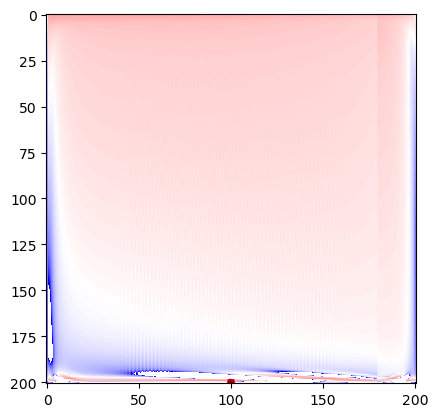

In [29]:
import matplotlib.pyplot as plt
plt.imshow(snap2, cmap="seismic", norm="log")

In [16]:
201 * 201

40401

# Mantis Utilities
### Author: G. Papageorgiou
In this notebook we showcase the palette of utilities for various purposes in the mantis codebase.

In [49]:
grid = manFD.Grid_Info(parmsfile ='wave_modelling_backend/parms.xlsx')

AttributeError: module 'mantis_wave_modelling.finite_difference.parameter_handling' has no attribute 'Grid_Info'

In [50]:
grid2 = manFD.JsonParameterFile(filename= "./wave_modelling_backend/parameters.json")

In [ ]:
manFD.FiniteDifferenceGridFromRockPhysicsModels()

In [28]:
input = {
    0: {"Top Depth": 0.0, "Vp": 2.82, "Vs": 1.25, "Rho": 2.35},
    1: {"Top Depth": 400.0, "Vp": 3.55, "Vs": 1.47, "Rho": 2.45},
    2: {"Top Depth": 800.0, "Vp": 2.94, "Vs": 1.36, "Rho": 2.37},
}
dic = {
    index: {"model": "generic", "parameters": {}}
    for index, _ in enumerate(input.keys())
}

In [51]:
cij_grid = manFD.FiniteDifferenceGridFromRockPhysicsModels(well_input=input,  mod_dictionary=dic, label="test")

In [53]:
cij_grid.create_modelling_grids(n_x_grid_points=201, n_z_grid_points=201,dx=5.0, offset=500),

({'a11': array([[ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         [ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         [ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         ...,
         [12602500., 12602500., 12602500., ..., 12602500., 12602500.,
          12602500.],
         [12602500., 12602500., 12602500., ..., 12602500., 12602500.,
          12602500.],
         [12602500., 12602500., 12602500., ..., 12602500., 12602500.,
          12602500.]], dtype=float32),
  'a33': array([[ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         [ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         [ 7952400.,  7952400.,  7952400., ...,  7952400.,  7952400.,
           7952400.],
         ...,
         [12602500., 12602500., 12602500., ..., 12602500., 12602500.,
          12602500.],
         [12602500., 

In [54]:
cij_grid.save_modelling_grids(
    output_folder="wave_modelling_backend/test",
    n_x_grid_points=201,
    n_z_grid_points=201,
    dx=5.0,
    offset=500,
)

In [ ]:
manFD.

In [36]:
%run -i 'runFD'

Exception: File `'runFD'` not found.